#### Import needed libs

In [1]:
from ydata_profiling import ProfileReport
import pandas as pd

In [2]:
df = pd.read_excel("SuperMarket Analysis.xlsx")

In [3]:
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
939,500-02-2261,Giza,Naypyitaw,Normal,Female,Food and beverages,57.29,6,360.9270,3/21/2019,17:04:00,Ewallet,343.74,4.761905,17.1870,5.9
270,783-09-1637,Cairo,Mandalay,Normal,Female,Sports and travel,67.43,5,354.0075,2019-06-03 00:00:00,18:13:00,Ewallet,337.15,4.761905,16.8575,6.3
445,390-80-5128,Cairo,Mandalay,Member,Female,Health and beauty,19.15,1,20.1075,1/28/2019,17:58:00,Credit card,19.15,4.761905,0.9575,9.5
319,787-15-1757,Giza,Naypyitaw,Member,Male,Health and beauty,44.07,4,185.0940,2/18/2019,16:28:00,Ewallet,176.28,4.761905,8.8140,8.4
894,811-35-1094,Cairo,Mandalay,Member,Male,Electronic accessories,50.45,6,317.8350,2019-06-02 00:00:00,15:16:00,Credit card,302.70,4.761905,15.1350,8.9


##### Overview

In [4]:
profile = ProfileReport(df, title="EDA Report", explorative=True)
profile.to_file("eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:00<00:00, 103.03it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Sales', 'Date', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

#### Overview with <i>`sweetviz`</i> lib

In [6]:
%pip install setuptools

import sweetviz as sv
import numpy as np

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Conflict error fix
import numpy as np

if not hasattr(np, "VisibleDeprecationWarning"):
	import warnings
	class VisibleDeprecationWarning(UserWarning):
		pass
	np.VisibleDeprecationWarning = VisibleDeprecationWarning

In [8]:
report = sv.analyze(df.drop(columns=["Date", "Time"]))
report.show_html("sweetviz_market_report.html")


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_market_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Sweetviz has a worst case time complexity of `O((n_1 + n_2) * m )` v.s ydata_profiling worst case `O(m ^ 2 * n)`

##### Business Questions:
1- What are the total sales, total profit, and cost of goods sold?</br>
2- Which customer type generates higher sales and profit?</br>
3- Is there a difference in sales between genders?</br>
4- Which branches and cities are the top performers?</br>
5- How do sales vary across months, and which months show peak performance?</br>
6- Which product lines are the most profitable?</br>
7- Which payment method drives higher profit?</br>
8- Do ratings vary by city, branch, or customer type?</br>

1- What are the total sales, total profit, and cost of goods sold?</br>

In [9]:
#total sales
total_sales = df['Sales'].sum()
print(f"Total Sales: {total_sales}")


Total Sales: 322966.749


In [10]:
# Total profit
total_profit = df['gross income'].sum()
print(f"Total Profit: {total_profit}")

Total Profit: 15379.368999999999


In [11]:
# Cost of goods sold
total_cogs = df['cogs'].sum()
print(f"Total Cost of Goods Sold: {total_cogs}")

Total Cost of Goods Sold: 307587.38


2- Which customer type generates higher sales and profit?</br>

In [12]:
maxi = df['Customer type'].value_counts()
maxi

Customer type
Member    565
Normal    435
Name: count, dtype: int64

In [13]:
members_profit = df[df['Customer type'] == 'Member']
sum1 = members_profit['gross income'].sum()
sum1

np.float64(9033.084)

In [14]:
members_profit = df[df['Customer type'] == 'Normal']
sum2 = members_profit['gross income'].sum()
sum2

np.float64(6346.285)

Members generates higher sales and profit

3- Is there a difference in sales between genders?</br>

In [15]:
df['Gender'].value_counts()

Gender
Female    571
Male      429
Name: count, dtype: int64

apparently females are more in sales terms

In [16]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Sales', 'Date', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

4- Which branches and cities are the top performers?</br>

In [17]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [18]:
df['Branch'].value_counts()

Branch
Alex     340
Cairo    332
Giza     328
Name: count, dtype: int64

5- How do sales vary across months, and which months show peak performance?</br>

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df['Date'][0:5]

0    2019-05-01 00:00:00
1    2019-08-03 00:00:00
2    2019-03-03 00:00:00
3              1/27/2019
4    2019-08-02 00:00:00
Name: Date, dtype: object

In [21]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

In [22]:
df['Date'].sample(5)

577   2019-01-14
432   2019-01-13
312   2019-01-02
590   2019-03-03
504   2019-02-25
Name: Date, dtype: datetime64[ns]

In [23]:
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()
df['Month'].head()

0        May
1     August
2      March
3    January
4     August
Name: Month, dtype: object

Text(0.5, 0, 'Month')

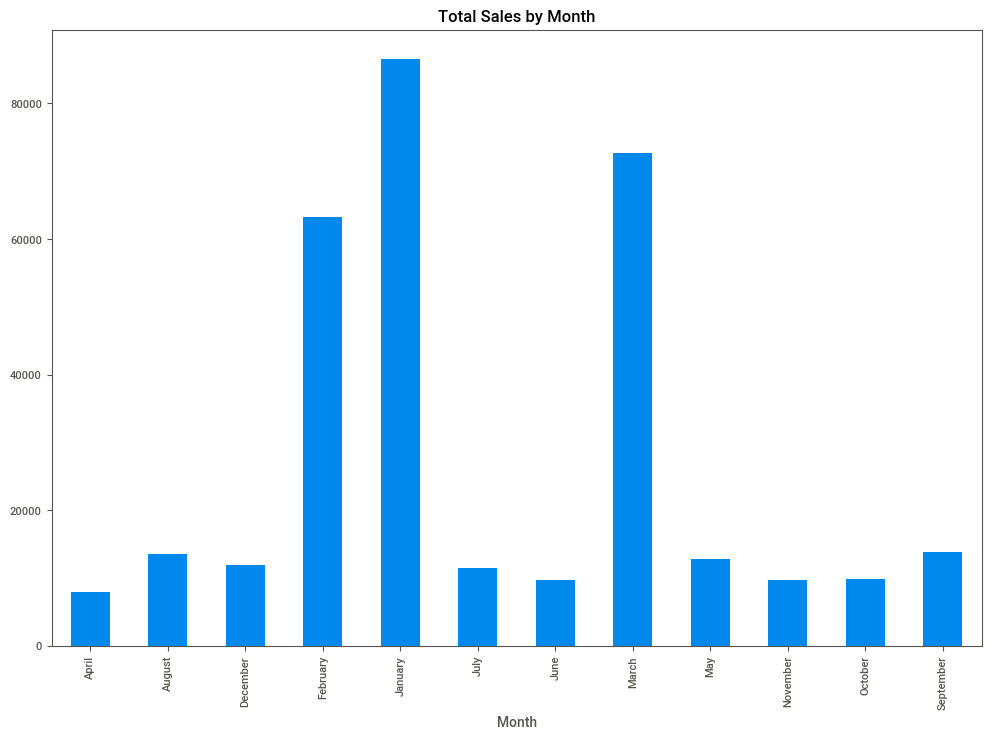

In [24]:
monthly_sales = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(12, 8))
monthly_sales.plot(kind='bar')
plt.title('Total Sales by Month')
plt.xlabel('Month')

6- Which product lines are the most profitable?</br>


Text(0.5, 1.0, 'Product Line Distribution')

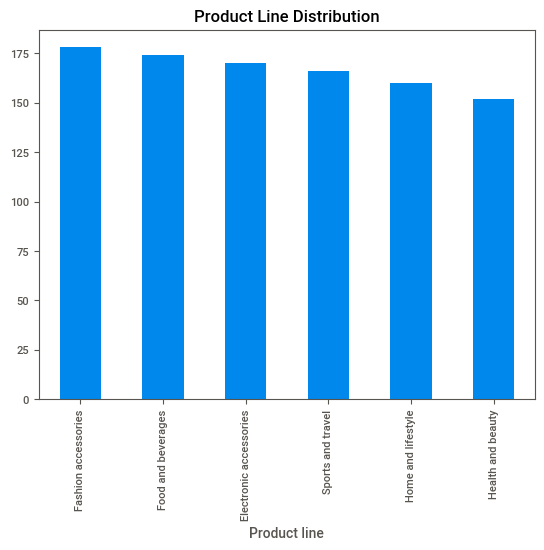

In [25]:
df['Product line'].value_counts().plot(kind='bar')
plt.title('Product Line Distribution')

Text(0.5, 0, 'Product Line')

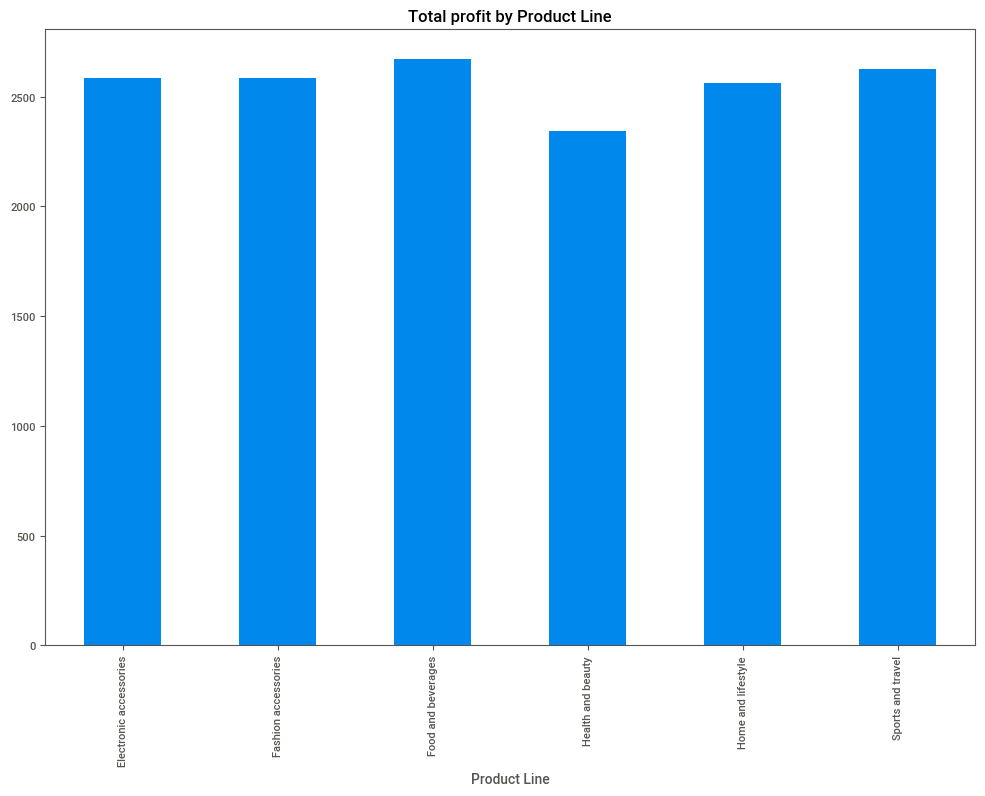

In [26]:
product_line_profit = df.groupby('Product line')['gross income'].sum()
plt.figure(figsize=(12, 8))
product_line_profit.plot(kind='bar')
plt.title('Total profit by Product Line')
plt.xlabel('Product Line')

7- Which payment method drives higher profit?</br>

<Axes: xlabel='Payment'>

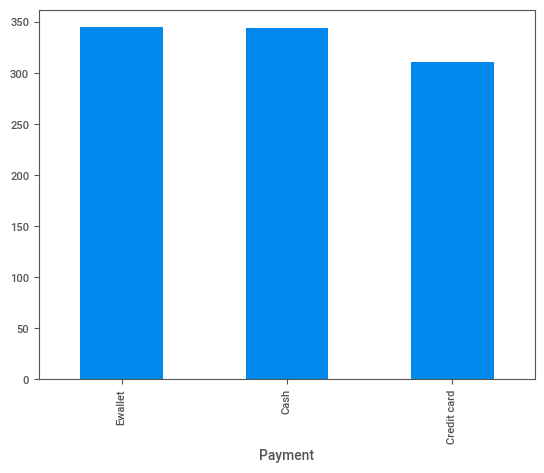

In [27]:
df['Payment'].value_counts().plot(kind='bar')

8- Do ratings vary by city, branch, or customer type?</br>

<Axes: xlabel='City'>

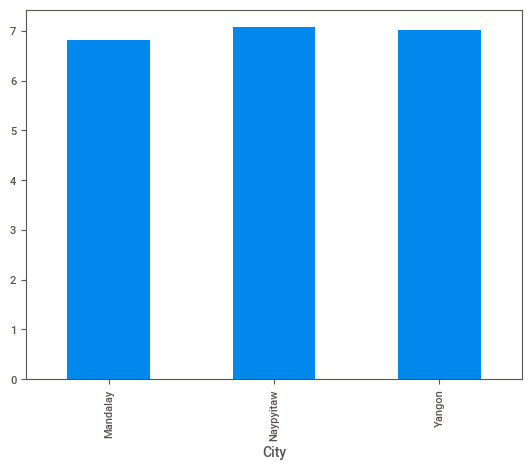

In [28]:
cities_ratings = df.groupby(['City'])['Rating']
cities_ratings.mean().plot(kind='bar')

<Axes: xlabel='Branch'>

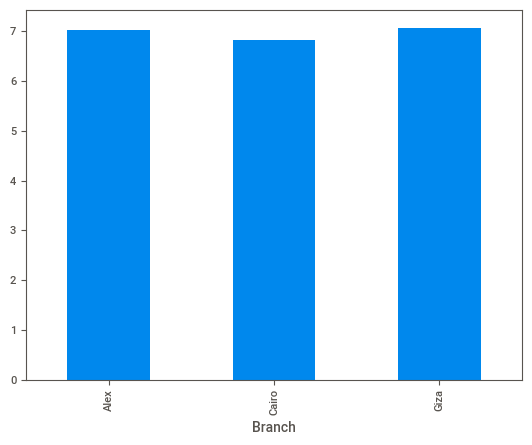

In [29]:
cities_ratings = df.groupby(['Branch'])['Rating']
cities_ratings.mean().plot(kind='bar')

<Axes: xlabel='Customer type'>

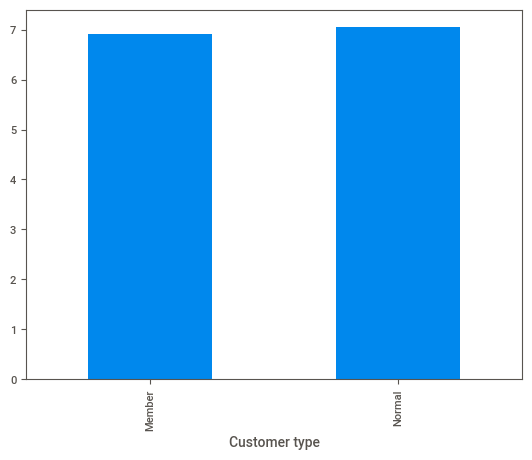

In [30]:
cities_ratings = df.groupby(['Customer type'])['Rating']
cities_ratings.mean().plot(kind='bar')

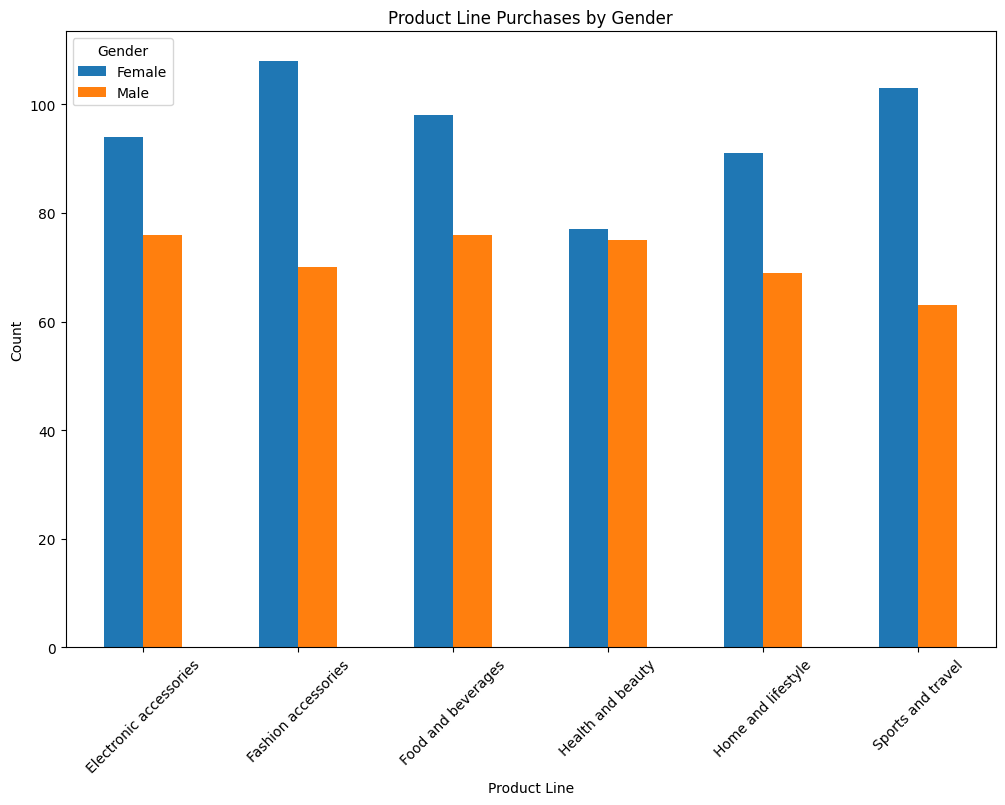

In [7]:
gender_product_counts = df.groupby(['Product line', 'Gender']).size().unstack()
gender_product_counts.plot(kind='bar', figsize=(12, 8))
plt.title('Product Line Purchases by Gender')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()